# Egor Bezriadin

## Research question/interests

I am interested in relations between gender, major category and followed salaries (which are Men/Women, Major_category and P25th/P75th columns respectively), also taking into consideration employment rate.

1. Which major categories have the highest employment rate?
2. What major categories have the highest share of women?
3. 

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
data = pd.read_csv("https://raw.githubusercontent.com/data301-2021-winter1/project-group02-project/main/data/raw/recent-grads.csv?token=AVRLUOGJDZTGX4CVVMPVL4DBQQHZQ")

# First look at the dataset

In [3]:
print("The first and the last 5 rows of the dataset: ")
data.head()

The first and the last 5 rows of the dataset: 


,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
0,1,2419,PETROLEUM ENGINEERING,2339.0,2057.0,282.0,Engineering,0.120564,36,1976,...,270,1207,37,0.018381,110000,95000,125000,1534,364,193
1,2,2416,MINING AND MINERAL ENGINEERING,756.0,679.0,77.0,Engineering,0.101852,7,640,...,170,388,85,0.117241,75000,55000,90000,350,257,50
2,3,2415,METALLURGICAL ENGINEERING,856.0,725.0,131.0,Engineering,0.153037,3,648,...,133,340,16,0.024096,73000,50000,105000,456,176,0
3,4,2417,NAVAL ARCHITECTURE AND MARINE ENGINEERING,1258.0,1123.0,135.0,Engineering,0.107313,16,758,...,150,692,40,0.050125,70000,43000,80000,529,102,0
4,5,2405,CHEMICAL ENGINEERING,32260.0,21239.0,11021.0,Engineering,0.341631,289,25694,...,5180,16697,1672,0.061098,65000,50000,75000,18314,4440,972


In [4]:
data.tail()

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
168,169,3609,ZOOLOGY,8409.0,3050.0,5359.0,Biology & Life Science,0.637293,47,6259,...,2190,3602,304,0.046320,26000,20000,39000,2771,2947,743
169,170,5201,EDUCATIONAL PSYCHOLOGY,2854.0,522.0,2332.0,Psychology & Social Work,0.817099,7,2125,...,572,1211,148,0.065112,25000,24000,34000,1488,615,82
170,171,5202,CLINICAL PSYCHOLOGY,2838.0,568.0,2270.0,Psychology & Social Work,0.799859,13,2101,...,648,1293,368,0.149048,25000,25000,40000,986,870,622
171,172,5203,COUNSELING PSYCHOLOGY,4626.0,931.0,3695.0,Psychology & Social Work,0.798746,21,3777,...,965,2738,214,0.053621,23400,19200,26000,2403,1245,308
172,173,3501,LIBRARY SCIENCE,1098.0,134.0,964.0,Education,0.877960,2,742,...,237,410,87,0.104946,22000,20000,22000,288,338,192


## Milestone 3

# Task 1
# Data Analysis

In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
print("Number of rows and columns in the dataset:", data.shape, "\n")
print("Names of columns in the dataset:\n", data.columns)

Number of rows and columns in the dataset: (173, 21) 

Names of columns in the dataset:
 Index(['Rank', 'Major_code', 'Major', 'Total', 'Men', 'Women',
       'Major_category', 'ShareWomen', 'Sample_size', 'Employed', 'Full_time',
       'Part_time', 'Full_time_year_round', 'Unemployed', 'Unemployment_rate',
       'Median', 'P25th', 'P75th', 'College_jobs', 'Non_college_jobs',
       'Low_wage_jobs'],
      dtype='object')


In [7]:
print("Table of unique values in the dataset:")
print(data.nunique())

Table of unique values in the dataset:
Rank                    173
Major_code              173
Major                   173
Total                   172
Men                     172
Women                   171
Major_category           16
ShareWomen              172
Sample_size             147
Employed                171
Full_time               173
Part_time               170
Full_time_year_round    173
Unemployed              161
Unemployment_rate       169
Median                   59
P25th                    48
P75th                    54
College_jobs            173
Non_college_jobs        173
Low_wage_jobs           166
dtype: int64


In [8]:
print("List of major categories:", data['Major_category'].unique())

print("\nChecking if there's any null values:")
data.isnull().sum()

List of major categories: ['Engineering' 'Business' 'Physical Sciences' 'Law & Public Policy'
 'Computers & Mathematics' 'Agriculture & Natural Resources'
 'Industrial Arts & Consumer Services' 'Arts' 'Health' 'Social Science'
 'Biology & Life Science' 'Education' 'Humanities & Liberal Arts'
 'Psychology & Social Work' 'Communications & Journalism'
 'Interdisciplinary']

Checking if there's any null values:


Rank                    0
Major_code              0
Major                   0
Total                   1
Men                     1
Women                   1
Major_category          0
ShareWomen              1
Sample_size             0
Employed                0
Full_time               0
Part_time               0
Full_time_year_round    0
Unemployed              0
Unemployment_rate       0
Median                  0
P25th                   0
P75th                   0
College_jobs            0
Non_college_jobs        0
Low_wage_jobs           0
dtype: int64

In [9]:
data.describe(include='object').T

,count,unique,top,freq
Major,173,173,PETROLEUM ENGINEERING,1
Major_category,173,16,Engineering,29


In [10]:
data.describe(include='float64').T

,count,mean,std,min,25%,50%,75%,max
Total,172.0,39370.081395,63483.491009,124.0,4549.750000,15104.000000,38909.750000,393735.000000
Men,172.0,16723.406977,28122.433474,119.0,2177.500000,5434.000000,14631.000000,173809.000000
Women,172.0,22646.674419,41057.330740,0.0,1778.250000,8386.500000,22553.750000,307087.000000
ShareWomen,172.0,0.522223,0.231205,0.0,0.336026,0.534024,0.703299,0.968954
Unemployment_rate,173.0,0.068191,0.030331,0.0,0.050306,0.067961,0.087557,0.177226


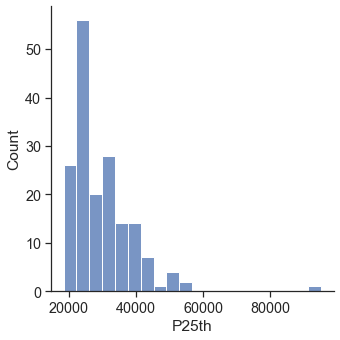

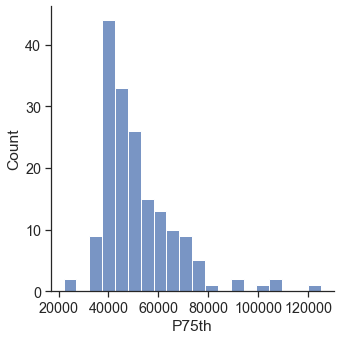

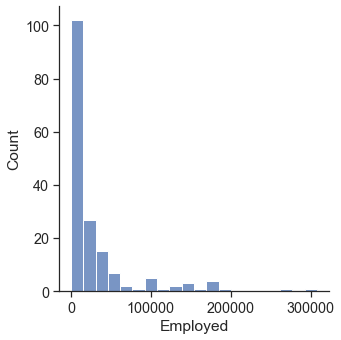

In [37]:
# Distribution Plot for P25th and P75th
sns.set_theme(style="ticks", font_scale=1.3)
sns.displot(data['P25th'], bins=20)
sns.displot(data['P75th'], bins=20)
sns.displot(data['Employed'], bins=20)

# Task 2-3

Load the unprocessed file:

In [11]:
import project_functions1 as p1

In [12]:
pathRaw = '../data/raw/recent-grads.csv'
rawData = p1.load_raw(pathRaw)
rawData

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
0,1,2419,PETROLEUM ENGINEERING,2339.0,2057.0,282.0,Engineering,0.120564,36,1976,...,270,1207,37,0.018381,110000,95000,125000,1534,364,193
1,2,2416,MINING AND MINERAL ENGINEERING,756.0,679.0,77.0,Engineering,0.101852,7,640,...,170,388,85,0.117241,75000,55000,90000,350,257,50
2,3,2415,METALLURGICAL ENGINEERING,856.0,725.0,131.0,Engineering,0.153037,3,648,...,133,340,16,0.024096,73000,50000,105000,456,176,0
3,4,2417,NAVAL ARCHITECTURE AND MARINE ENGINEERING,1258.0,1123.0,135.0,Engineering,0.107313,16,758,...,150,692,40,0.050125,70000,43000,80000,529,102,0
4,5,2405,CHEMICAL ENGINEERING,32260.0,21239.0,11021.0,Engineering,0.341631,289,25694,...,5180,16697,1672,0.061098,65000,50000,75000,18314,4440,972
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
168,169,3609,ZOOLOGY,8409.0,3050.0,5359.0,Biology & Life Science,0.637293,47,6259,...,2190,3602,304,0.046320,26000,20000,39000,2771,2947,743
169,170,5201,EDUCATIONAL PSYCHOLOGY,2854.0,522.0,2332.0,Psychology & Social Work,0.817099,7,2125,...,572,1211,148,0.065112,25000,24000,34000,1488,615,82
170,171,5202,CLINICAL PSYCHOLOGY,2838.0,568.0,2270.0,Psychology & Social Work,0.799859,13,2101,...,648,1293,368,0.149048,25000,25000,40000,986,870,622
171,172,5203,COUNSELING PSYCHOLOGY,4626.0,931.0,3695.0,Psychology & Social Work,0.798746,21,3777,...,965,2738,214,0.053621,23400,19200,26000,2403,1245,308


# Remove columns we don't need

In [21]:
cdf = p1.process_data(pathRaw) #cdf = clean dataframe

In [22]:
cdf.describe(include='float64').T

,count,mean,std,min,25%,50%,75%,max
Total,172.0,39370.081395,63483.491009,124.0,4549.750000,15104.000000,38909.750000,393735.000000
Men,172.0,16723.406977,28122.433474,119.0,2177.500000,5434.000000,14631.000000,173809.000000
Women,172.0,22646.674419,41057.330740,0.0,1778.250000,8386.500000,22553.750000,307087.000000
ShareWomen,172.0,0.522223,0.231205,0.0,0.336026,0.534024,0.703299,0.968954
Unemployment_rate,172.0,0.068024,0.030340,0.0,0.050261,0.067544,0.087247,0.177226


In [23]:
cdf.describe(include='int64').T

,count,mean,std,min,25%,50%,75%,max
Employed,172.0,31355.808140,50777.428650,0.0,3734.75,12031.5,31701.25,307933.0
Full_time,172.0,26165.767442,42957.122320,111.0,3181.00,10073.5,25447.25,251540.0
Part_time,172.0,8877.232558,14679.038729,0.0,1013.75,3332.5,9981.00,115172.0
Full_time_year_round,172.0,19798.843023,33229.227514,111.0,2474.75,7436.5,17674.75,199897.0
Unemployed,172.0,2428.412791,4121.730452,0.0,299.50,905.0,2397.00,28169.0
Median,172.0,40076.744186,11461.388773,22000.0,33000.00,36000.0,45000.00,110000.0
P25th,172.0,29486.918605,9190.769927,18500.0,24000.00,27000.0,33250.00,95000.0
P75th,172.0,51386.627907,14882.278650,22000.0,41750.00,47000.0,58500.00,125000.0


In [16]:
cdf = p1.group_by_majorCat(cdf)

print("Dataset grouped by major:")
cdf

Dataset grouped by major:


,Major_category,Total,Men,Women,ShareWomen,Employed,Full_time,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th
0,Agriculture & Natural Resources,75620.0,40357.0,35263.0,3.647407,63794,55585,15470,41891,3486,0.466352,316000,222000,410100
1,Arts,357130.0,134390.0,222740.0,4.829264,288114,207773,114791,153111,28228,0.721382,264500,175700,349300
2,Biology & Life Science,453862.0,184919.0,268943.0,8.220700,302797,240377,116736,165802,22854,0.852849,509900,372600,645200
3,Business,1302376.0,667852.0,634524.0,6.281573,1088742,988870,196936,790425,79877,0.923826,566000,435000,713000
4,Communications & Journalism,392601.0,131921.0,260680.0,2.633536,330660,273330,89817,214228,26852,0.302151,138000,105000,179900
5,Computers & Mathematics,299008.0,208725.0,90283.0,3.429494,237894,207545,53270,159156,18373,0.926816,470200,322200,639000
6,Education,559129.0,103526.0,455603.0,11.976120,479839,398059,120593,288031,24969,0.827232,517600,425450,617000
7,Engineering,537583.0,408307.0,129276.0,6.927772,420372,381867,85136,288952,29817,1.836682,1664100,1205100,2043000
8,Health,463230.0,75517.0,387713.0,9.541823,372147,294819,114592,228418,22213,0.791042,441900,314000,603000
9,Humanities & Liberal Arts,713468.0,272846.0,440622.0,9.476856,544118,416939,214030,295561,51101,1.215114,478700,352400,631100


# Making seaborn Plots

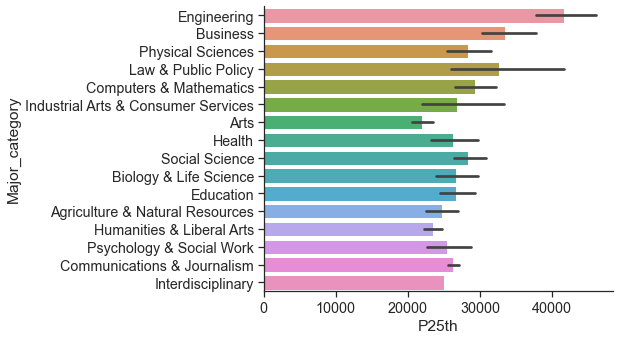

In [44]:
ax = sns.catplot(x="Emp", y="Major_category", data = cdf, kind="bar")
ax.fig.set_size_inches(25,5)
plt.show()

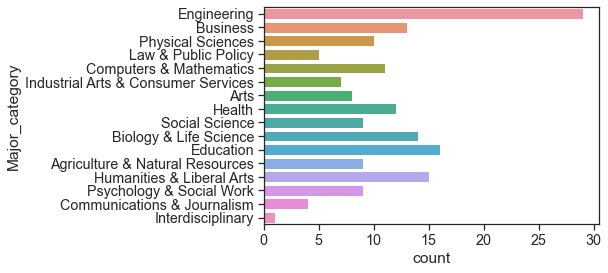

In [46]:
ax = sns.countplot(y='Major_category', data=cdf)